# Predicting presence of Heart Disease

## 1. Importing essential libraries

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Reading data

In [2]:
dataset = pd.read_csv("/home/arraygen/Akshata/Machine_Learning/6_to_12_Machine_Learning/Classification/input/heart.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=5)


In [7]:
X_train.shape

(242, 13)

In [8]:
X_test.shape

(61, 13)

In [9]:
Y_train.shape

(242,)

In [10]:
Y_test.shape

(61,)

## 5. Model Fitting

### Neural Network

In [11]:

from sklearn.preprocessing import StandardScaler , MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()

# normalize data
X_train_scaled = sc.fit_transform(X_train)
X_train1 = X_train_scaled.reshape(242,13,1)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = sc.fit_transform(X_test)
X_test1 = X_test_scaled.reshape(61, 13, 1)
X_test = pd.DataFrame(X_test_scaled)

print (X_train.shape, Y_train.shape)
print (X_train.shape, Y_test.shape)
print (dataset.columns)

(242, 13) (242,)
(242, 13) (61,)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [12]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , LeakyReLU  , BatchNormalization


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

In [13]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=13, kernel_initializer = 'he_uniform', input_dim = 13 , activation = 'relu')) 
#classifier.add(BatchNormalization())
classifier.add(Dense(units=16, kernel_initializer = 'he_uniform', activation = 'relu')) 
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#classifier.get_weights()

In [14]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                224       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 423
Trainable params: 423
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit the model to the training data
history= classifier.fit(X_train,Y_train,epochs=170,validation_data=(X_test, Y_test)) #

Train on 242 samples, validate on 61 samples
Epoch 1/170
242/242 [==============================] - 1s 3ms/step - loss: 0.9445 - acc: 0.3802 - val_loss: 0.9224 - val_acc: 0.3607
Epoch 2/170
242/242 [==============================] - 0s 143us/step - loss: 0.8912 - acc: 0.4256 - val_loss: 0.8746 - val_acc: 0.3770
Epoch 3/170
242/242 [==============================] - 0s 109us/step - loss: 0.8175 - acc: 0.4669 - val_loss: 0.8325 - val_acc: 0.4426
Epoch 4/170
242/242 [==============================] - 0s 174us/step - loss: 0.7669 - acc: 0.4959 - val_loss: 0.7968 - val_acc: 0.4262
Epoch 5/170
242/242 [==============================] - 0s 139us/step - loss: 0.7287 - acc: 0.5124 - val_loss: 0.7663 - val_acc: 0.4754
Epoch 6/170
242/242 [==============================] - 0s 121us/step - loss: 0.7249 - acc: 0.5248 - val_loss: 0.7373 - val_acc: 0.5410
Epoch 7/170
242/242 [==============================] - 0s 152us/step - loss: 0.7081 - acc: 0.5868 - val_loss: 0.7114 - val_acc: 0.5902
Epoch 8/170


Epoch 61/170
242/242 [==============================] - 0s 170us/step - loss: 0.3584 - acc: 0.8471 - val_loss: 0.3238 - val_acc: 0.8852
Epoch 62/170
242/242 [==============================] - 0s 156us/step - loss: 0.3546 - acc: 0.8347 - val_loss: 0.3227 - val_acc: 0.8852
Epoch 63/170
242/242 [==============================] - 0s 151us/step - loss: 0.3774 - acc: 0.8182 - val_loss: 0.3227 - val_acc: 0.8852
Epoch 64/170
242/242 [==============================] - 0s 152us/step - loss: 0.3593 - acc: 0.8471 - val_loss: 0.3226 - val_acc: 0.8852
Epoch 65/170
242/242 [==============================] - 0s 121us/step - loss: 0.3468 - acc: 0.8595 - val_loss: 0.3221 - val_acc: 0.8852
Epoch 66/170
242/242 [==============================] - 0s 125us/step - loss: 0.3553 - acc: 0.8471 - val_loss: 0.3207 - val_acc: 0.8852
Epoch 67/170
242/242 [==============================] - 0s 136us/step - loss: 0.3504 - acc: 0.8223 - val_loss: 0.3192 - val_acc: 0.8852
Epoch 68/170
242/242 [==========================

242/242 [==============================] - 0s 183us/step - loss: 0.2753 - acc: 0.8926 - val_loss: 0.3028 - val_acc: 0.8852
Epoch 122/170
242/242 [==============================] - 0s 150us/step - loss: 0.2569 - acc: 0.9008 - val_loss: 0.3020 - val_acc: 0.8852
Epoch 123/170
242/242 [==============================] - 0s 142us/step - loss: 0.2699 - acc: 0.8926 - val_loss: 0.3018 - val_acc: 0.8852
Epoch 124/170
242/242 [==============================] - 0s 137us/step - loss: 0.2638 - acc: 0.8967 - val_loss: 0.3028 - val_acc: 0.8852
Epoch 125/170
242/242 [==============================] - 0s 156us/step - loss: 0.2432 - acc: 0.9050 - val_loss: 0.3038 - val_acc: 0.8852
Epoch 126/170
242/242 [==============================] - 0s 124us/step - loss: 0.2547 - acc: 0.9050 - val_loss: 0.3043 - val_acc: 0.8852
Epoch 127/170
242/242 [==============================] - 0s 149us/step - loss: 0.2718 - acc: 0.8967 - val_loss: 0.3049 - val_acc: 0.8852
Epoch 128/170
242/242 [==============================] 

In [16]:
history

In [17]:
Y_pred_nn = classifier.predict(X_test)

In [18]:
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded


In [19]:
classifier.evaluate(X_test,Y_test)

61/61 [==============================] - 0s 193us/step


[0.3305570683518394, 0.8852459035935949]

In [20]:
from sklearn.metrics import accuracy_score
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 88.52 %


In [21]:

history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

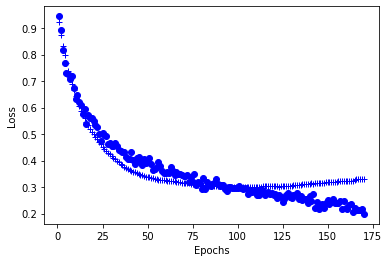

In [22]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

[[25  5]
 [ 2 29]]


Text(0.5, 1.0, 'Accuracy Score: 88.52')

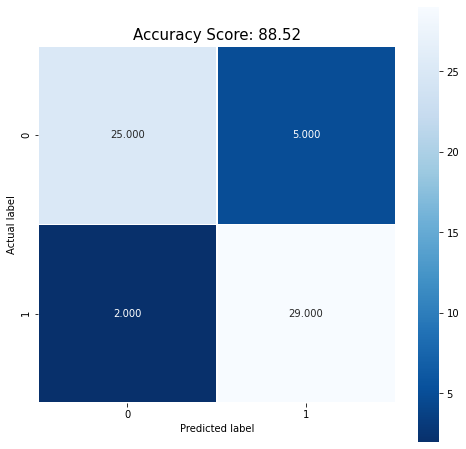

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, Y_pred_nn)
print(cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_nn)
plt.title(all_sample_title, size = 15)

In [24]:
print(metrics.classification_report(Y_test, Y_pred_nn))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [25]:
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Conv1D, MaxPool1D
epochs = 50
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape = (13,1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 12, 64)            192       
_________________________________________________________________
flatten_1 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                49216     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 49,473
Trainable params: 49,473
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [27]:
X_train.shape , X_test.shape

((242, 13), (61, 13))

In [28]:
history = model.fit(X_train1, Y_train, epochs=200, validation_data=(X_test1, Y_test),verbose=1)

Train on 242 samples, validate on 61 samples
Epoch 1/200
242/242 [==============================] - 1s 2ms/step - loss: 0.7091 - acc: 0.4504 - val_loss: 0.7216 - val_acc: 0.3443
Epoch 2/200
242/242 [==============================] - 0s 374us/step - loss: 0.7191 - acc: 0.4463 - val_loss: 0.7079 - val_acc: 0.4426
Epoch 3/200
242/242 [==============================] - 0s 277us/step - loss: 0.6982 - acc: 0.4835 - val_loss: 0.6947 - val_acc: 0.5410
Epoch 4/200
242/242 [==============================] - 0s 390us/step - loss: 0.6872 - acc: 0.5661 - val_loss: 0.6821 - val_acc: 0.5902
Epoch 5/200
242/242 [==============================] - 0s 249us/step - loss: 0.6779 - acc: 0.5868 - val_loss: 0.6700 - val_acc: 0.6230
Epoch 6/200
242/242 [==============================] - 0s 316us/step - loss: 0.6495 - acc: 0.6818 - val_loss: 0.6579 - val_acc: 0.7049
Epoch 7/200
242/242 [==============================] - 0s 378us/step - loss: 0.6395 - acc: 0.6901 - val_loss: 0.6467 - val_acc: 0.7213
Epoch 8/200


Epoch 61/200
242/242 [==============================] - 0s 208us/step - loss: 0.3946 - acc: 0.8347 - val_loss: 0.3523 - val_acc: 0.8689
Epoch 62/200
242/242 [==============================] - 0s 196us/step - loss: 0.3769 - acc: 0.8430 - val_loss: 0.3506 - val_acc: 0.8689
Epoch 63/200
242/242 [==============================] - 0s 196us/step - loss: 0.3877 - acc: 0.8264 - val_loss: 0.3493 - val_acc: 0.8689
Epoch 64/200
242/242 [==============================] - 0s 225us/step - loss: 0.3795 - acc: 0.8388 - val_loss: 0.3477 - val_acc: 0.8689
Epoch 65/200
242/242 [==============================] - 0s 236us/step - loss: 0.3972 - acc: 0.8223 - val_loss: 0.3465 - val_acc: 0.8689
Epoch 66/200
242/242 [==============================] - 0s 229us/step - loss: 0.3861 - acc: 0.8388 - val_loss: 0.3459 - val_acc: 0.8689
Epoch 67/200
242/242 [==============================] - 0s 333us/step - loss: 0.3956 - acc: 0.8471 - val_loss: 0.3446 - val_acc: 0.8689
Epoch 68/200
242/242 [==========================

242/242 [==============================] - 0s 258us/step - loss: 0.3463 - acc: 0.8512 - val_loss: 0.3182 - val_acc: 0.8852
Epoch 122/200
242/242 [==============================] - 0s 244us/step - loss: 0.3369 - acc: 0.8678 - val_loss: 0.3175 - val_acc: 0.8852
Epoch 123/200
242/242 [==============================] - 0s 294us/step - loss: 0.3291 - acc: 0.8636 - val_loss: 0.3172 - val_acc: 0.8852
Epoch 124/200
242/242 [==============================] - 0s 303us/step - loss: 0.3311 - acc: 0.8554 - val_loss: 0.3173 - val_acc: 0.8852
Epoch 125/200
242/242 [==============================] - 0s 310us/step - loss: 0.3486 - acc: 0.8471 - val_loss: 0.3169 - val_acc: 0.8852
Epoch 126/200
242/242 [==============================] - 0s 313us/step - loss: 0.3574 - acc: 0.8347 - val_loss: 0.3167 - val_acc: 0.8852
Epoch 127/200
242/242 [==============================] - 0s 349us/step - loss: 0.3558 - acc: 0.8471 - val_loss: 0.3164 - val_acc: 0.8852
Epoch 128/200
242/242 [==============================] 

Epoch 181/200
242/242 [==============================] - 0s 293us/step - loss: 0.3112 - acc: 0.8719 - val_loss: 0.3127 - val_acc: 0.8852
Epoch 182/200
242/242 [==============================] - 0s 278us/step - loss: 0.3110 - acc: 0.8719 - val_loss: 0.3129 - val_acc: 0.8852
Epoch 183/200
242/242 [==============================] - 0s 377us/step - loss: 0.3164 - acc: 0.8554 - val_loss: 0.3128 - val_acc: 0.8852
Epoch 184/200
242/242 [==============================] - 0s 338us/step - loss: 0.3138 - acc: 0.8554 - val_loss: 0.3130 - val_acc: 0.8852
Epoch 185/200
242/242 [==============================] - 0s 261us/step - loss: 0.3197 - acc: 0.8595 - val_loss: 0.3128 - val_acc: 0.8852
Epoch 186/200
242/242 [==============================] - 0s 233us/step - loss: 0.3259 - acc: 0.8760 - val_loss: 0.3124 - val_acc: 0.8852
Epoch 187/200
242/242 [==============================] - 0s 213us/step - loss: 0.3196 - acc: 0.8595 - val_loss: 0.3121 - val_acc: 0.8852
Epoch 188/200
242/242 [==================

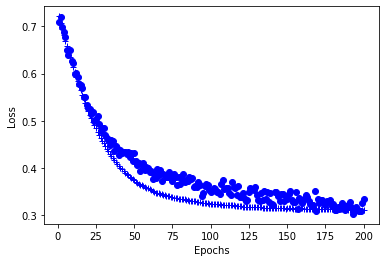

In [29]:

history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

[[26  4]
 [ 2 29]]


Text(0.5, 1.0, 'Accuracy Score: 90.16')

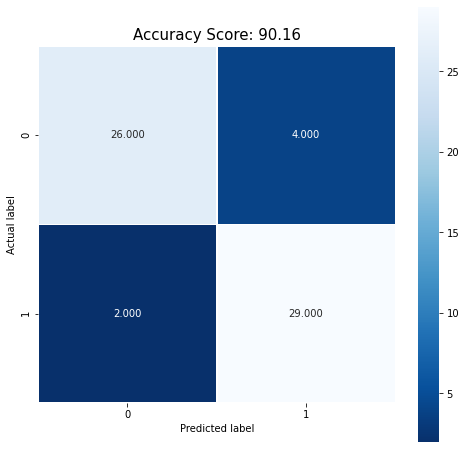

In [30]:
Y_pred_cnn  = model.predict(X_test1)
rounded = [round(x[0]) for x in Y_pred_cnn]
Y_pred_cnn = rounded
score_cnn = round(accuracy_score(Y_pred_cnn,Y_test)*100,2)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, Y_pred_cnn)
print(cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_cnn)
plt.title(all_sample_title, size = 15)